In [1]:
# Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read in CSV and Convert Fatalities CSV to a Dataframe
df = pd.read_csv("PoliceF_2.csv")
Police_DF = pd.read_csv("PoliceF_2.csv")
Police_DF.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [9]:
#Insert Year and Month Column
Police_DF = Police_DF.reindex(columns = ['UID', 'Name', 'Age', 'Gender', 'Race', 'Date', 'Year', 'Month', 'City', 'State', 'Manner_of_death', 'Armed', 'Mental_illness', 'Flee']) 

#Remove NaN from DataFrame Columns
Police_DF = Police_DF.replace(np.nan, '', regex=True)

#Add Year to Year Column and Month to Month Column
Police_DF['Date'] = pd.to_datetime(Police_DF['Date'])
Police_DF['Year'], Police_DF['Month'] = Police_DF['Date'].dt.year, Police_DF['Date'].dt.month
Police_DF.head()

,UID,Name,Age,Gender,Race,Date,Year,Month,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44,Female,Asian,2000-05-04,2000,5,Alameda,CA,Shot,,False,False
1,169,Chyraphone Komvongsa,26,Male,Asian,2000-06-02,2000,6,Fresno,CA,Shot,,False,False
2,257,Ming Chinh Ly,36,Male,Asian,2000-08-13,2000,8,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29,Male,Asian,2001-02-09,2001,2,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25,Male,Asian,2001-06-10,2001,6,Riverside,CA,Shot,Knife,False,False


In [7]:
#State Frequency
# state_frequency = Police_DF["State"].value_counts().reset_index()
state_frequency = Police_DF["State"].value_counts().reset_index().rename(columns={'index': 'State', "State": 'Count'})
state_frequency.head()

,State,Count
0,CA,2913
1,TX,1190
2,FL,1028
3,AZ,585
4,NY,390


In [10]:
#Summary Stats of State Frequency
state_frequency['Count'].describe()

count      51.000000
mean      244.921569
std       440.630360
min        13.000000
25%        60.500000
50%       128.000000
75%       258.500000
max      2913.000000
Name: Count, dtype: float64

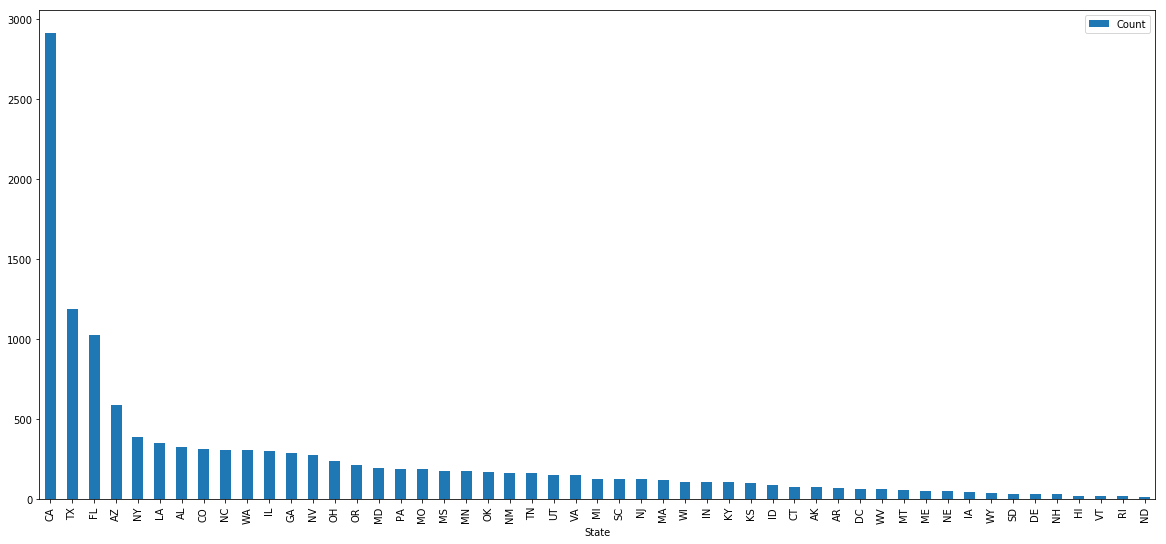

In [13]:
#Bar Graph for State Fatalities
state_frequency.plot.bar(x= 'State', y = 'Count')
plt.rcParams['figure.figsize'] = (18,8)